In [1]:
%load_ext autoreload
%autoreload 2

from datasets import SyntheticDataset
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
synda = SyntheticDataset()

In [3]:
%timeit SyntheticDataset()

719 ms ± 8.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
synda.y.head(), synda.X.head()

(            population initial_infected network  k  infectiousness     i_out  \
 case                                                                           
 BA-4-0500-0        500                7      BA  4        0.229665  0.588491   
 BA-4-0500-1        500                4      BA  4        0.202551  0.546232   
 BA-4-0500-2        500                2      BA  4        0.117391  0.252688   
 BA-4-0500-3        500                4      BA  4        0.108198  0.357485   
 BA-4-0500-4        500               10      BA  4        0.066441  0.167633   
 
              i_rec_prop  
 case                     
 BA-4-0500-0    0.956276  
 BA-4-0500-1    0.942150  
 BA-4-0500-2    0.982669  
 BA-4-0500-3    0.948447  
 BA-4-0500-4    0.916552  ,
 case
 BA-4-0500-0    [[0.0, 0.986, 0.014, 0.0, 0.0], [0.4875, 0.986...
 BA-4-0500-1    [[0.0, 0.992, 0.008, 0.0, 0.0], [0.815, 0.992,...
 BA-4-0500-2    [[0.0, 0.996, 0.004, 0.0, 0.0], [1.0, 0.996, 0...
 BA-4-0500-3    [[0.0, 0.992, 0.008, 

In [5]:
def plot_timeseries(X):
    columns = ['step'] + synda.compartments

    df = pd.DataFrame(X, columns=columns)

    df.plot(y=synda.compartments, x='step')
    plt.show()

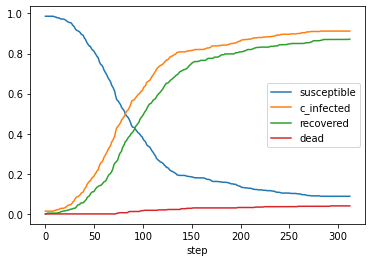

population               500
initial_infected           7
network                   ER
k                          4
infectiousness      0.211927
i_out               0.660268
i_rec_prop          0.952471
Name: ER-4-0500-49, dtype: object


In [6]:
DSN = "ER-4-0500-49"

X0, y0 = synda[DSN]

plot_timeseries(X0)

print(y0)

In [7]:
print(len(synda))

4800


In [8]:
train, test = synda.split([0.7, 0.2])

In [9]:
%timeit synda.split([0.5, 0.25, 0.25])

405 ms ± 3.92 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
train.X.shape, train.variable('infectiousness').shape

((3360, 401, 5), (3360,))

In [11]:
test.X.shape, test.variable('k').shape

((960, 401, 5), (960,))